#**Agave Classification**

Here we have the implementation of an idea that arose based on the available data of agave. The idea was to develop a machine learning model that can classify agave plants based on morphological data such as sizes, colors, and shapes, which are easily identifiable characteristics in the field. In addition to the classification capability, we can interpret the model and evaluate which characteristic contributes the most to the identification of species.

The dataset and the pictures of this notebook can be found in the article below:

## **Rescuing the Brazilian Agave breeding program: morphophysiological and molecular characterization of a new germplasm**

**AUTHOR:** Raya Fabio Trigo, de Carvalho Lucas Miguel, José Juliana, da Cruz Larissa Prado, Almeida Rafael Leonardo, Delevatti Heliur Alves de Almeida, Silveira Neidiquele Maria, da Silva Simone Ferreira, Pissolato Maria Dolores, de Oliveira Adriele Bárbara, dos Reis Wagner José Villela, de Abreu Luís Guilherme Furlan, Gutiérrez Jesús, Carazzolle Marcelo Falsarella, Soares Ana Cristina Fermino, Nieto Sotelo Jorge, Ribeiro Rafael Vasconcelos, Pereira Gonçalo Amarante Guimarães**

**JOURNAL:** Frontiers in Chemical Engineering

**VOLUME:** 5

**YEAR:** 2023

**URL:** [Read the article](https://www.frontiersin.org/articles/10.3389/fceng.2023.1218668)

**DOI:** [10.3389/fceng.2023.1218668](https://doi.org/10.3389/fceng.2023.1218668)

**ISSN:** 2673-2718


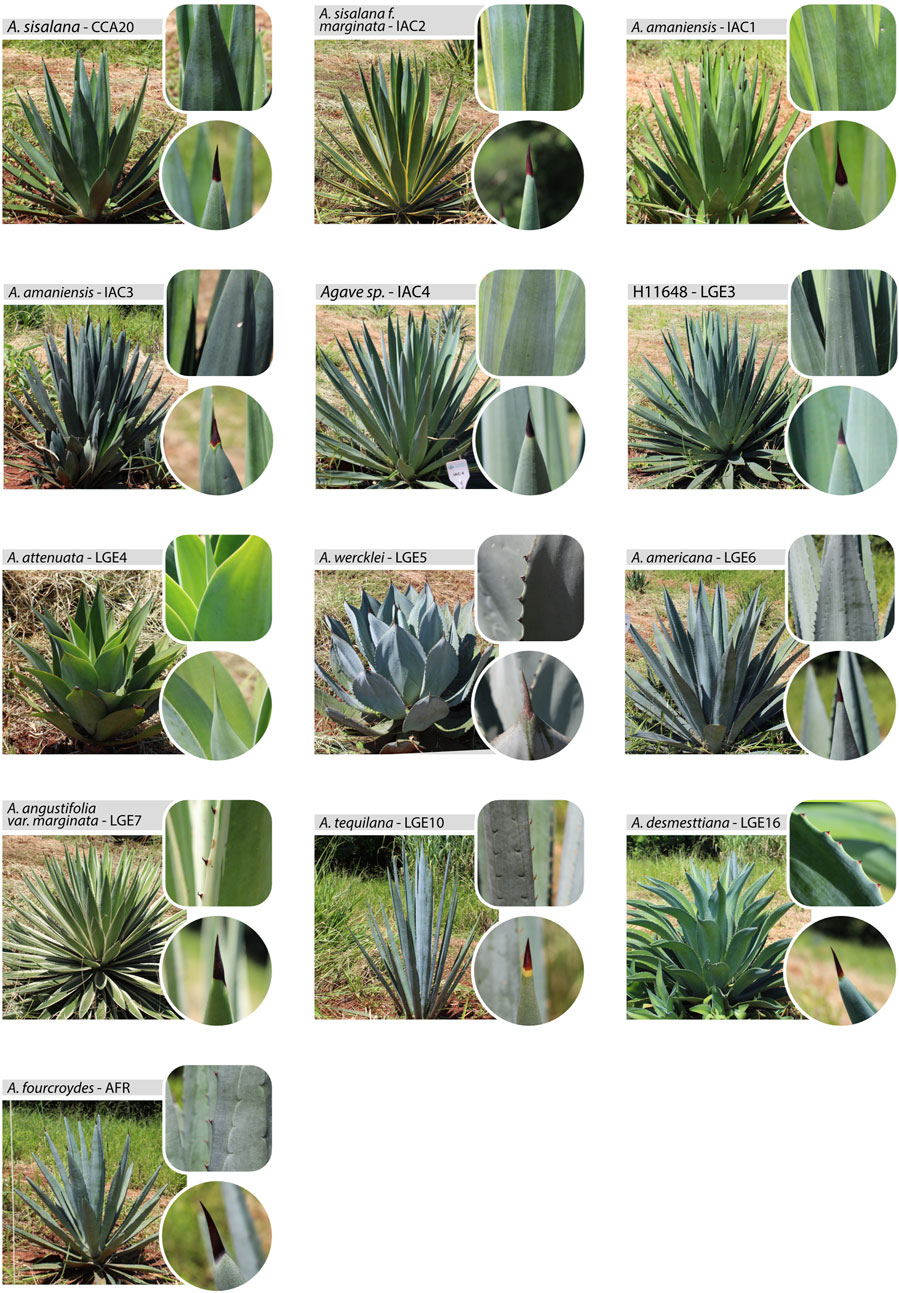

## Approach

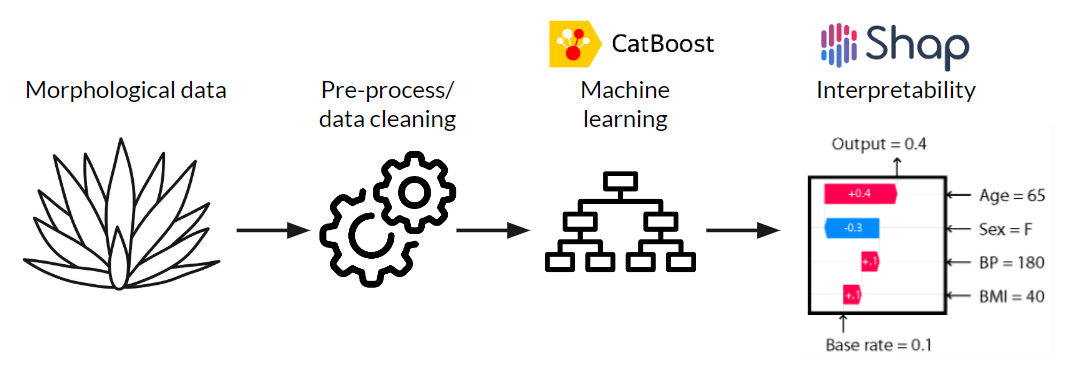

* **The Pre-process/data cleaning were done previously**

##**Installing packages**

In [ ]:
!pip install catboost
!pip install shap

##**Load libraries**

In [2]:
#load libraries
import catboost
from catboost import *
from catboost import CatBoostClassifier
import shap
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**Load Agave dataset**

In [3]:
agave_merged = pd.read_excel('/content/drive/MyDrive/DOUTORADO_LGE/AGAVE/fabio_raya/agave_merged.xlsx')
# Replace missing values with a string representation
agave_merged.fillna("NaN", inplace=True)
agave_merged.head(5)

,ID,taxon,leaf_age,leaf_curvature,leaf_orientation,roughness,teeth_presence,V,apical_spine_length,leaf_length,...,C,LXC,a,hue,hue_angle,L,MDBT,DALS,n_teeth_10cm,TBW
0,IAC3,amaniensis,Mature,CV,RT,SM,N,NOR,2.586,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IAC3,amaniensis,Mature,CV,RT,SM,N,NOR,2.697,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IAC3,amaniensis,Mature,CV,RT,SM,N,NOR,3.103,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IAC6,amaniensis,Mature,CV,RT,SM,N,NOR,2.527,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IAC6,amaniensis,Mature,CV,RT,SM,N,NOR,2.773,182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Metadata traits**

| Categorical traits   | Values                                                |
|-----------------------|-------------------------------------------------------|
| Leaf age              | "Mature; Young"                                       |
| Teeth presence        | "Present (Y); Absent (N); Escape (E)"                 |
| Roughness             | "Smooth (SM); Adaxial (AD); Abaxial (AB); Both (BO)"  |
| Leaf curvature        | "Plane (PL); Concave (CV); Convex (CX)"               |
| Leaf shape            | "Linear (LN); Lanceolate (LC); Spatulate (SP); Deltoid (DT); Oblong (OB); Ovate (OV)" |
| Leaf orientation      | "Straight (RT); Sigmoidal (SG); Curved upward (CC); Curved downward (CB)" |
| V                     | "Marginata (MAR); Normal (NOR)"                        |


| Continuous traits                                |
|--------------------------------------------------|
| Leaf length                                      |
| Leaf width                                       |
| Leaf length-to-width ratio (LWR)                 |
| Leaf base width                                  |
| Leaf Thickness                                   |
| Apical spine length (ASL)                        |
| Tooth length (TL)                                |
| Distance between teeth (DBT)                     |
| "Mean distance between last lateral and apical spines (DALS)" |
| Minimum distance between teeth (MDBT)           |
| Number of teeth in 10 cm (TN)                    |
| Tooth basal width (TBW)                          |
| C (colorimeter parameter)                        |
| L (colorimeter parameter)                        |
| a (colorimeter parameter)                        |
| b (colorimeter parameter)                        |
| Hue angle                                        |
| Hue                                              |
| °h/(LxC)                                         |


###**check all the columns names**

In [ ]:
agave_merged.columns

Index(['ID', 'taxon', 'leaf_age', 'leaf_curvature', 'leaf_orientation',
       'roughness', 'teeth_presence', 'V', 'apical_spine_length',
       'leaf_length', 'leaf_width ', 'length_to_width', 'tooth_length', 'DBT',
       'leaf_thickness', 'leaf_base_width_', 'leaf_shape', 'b', 'C', 'LXC',
       'a', 'hue', 'hue_angle', 'L', 'MDBT', 'DALS', 'n_teeth_10cm', 'TBW'],
      dtype='object')

###**check the number of taxons**

In [4]:
agave_merged['taxon'].describe()

count          303
unique          14
top       sisalana
freq            78
Name: taxon, dtype: object

###**check the number of individuals in each taxon**

In [5]:
agave_merged['taxon'].value_counts()

sisalana                      78
sisalana_f_marginata          42
amaniensis                    35
tequilana                     31
desmettiana                   26
IAC4                          16
wercklei                      16
americana                     13
H11648                        13
fourcroydes_var_remigio       10
angustifolia_var_marginata     9
attenuata                      8
furcroydes                     3
vivipara                       3
Name: taxon, dtype: int64

###**check the unique values in the categorical variables**

In [6]:
for col in agave_merged[['taxon', 'leaf_age', 'leaf_curvature', 'leaf_orientation',
       'roughness', 'teeth_presence', 'V','leaf_shape']]:
    print(agave_merged[col].unique())

['amaniensis' 'americana' 'angustifolia_var_marginata' 'attenuata'
 'desmettiana' 'fourcroydes_var_remigio' 'furcroydes' 'H11648' 'IAC4'
 'sisalana' 'sisalana_f_marginata' 'tequilana' 'vivipara' 'wercklei']
['Mature' 'Youthful']
['CV' 'PL' 'CX']
['RT' 'SG' 'CC']
['SM' 'AB' 'NaN' 'BO']
['N' 'E' 'Y']
['NOR' 'MAR']
['LC' 'OB' 'NaN' 'SP' 'LI' 'OV']


##**Split dataset**

In [7]:
# Splitting the data into predictor variables (X) and target variable (y)
X = agave_merged.drop(['taxon','ID'], axis=1)
y = agave_merged['taxon']

# Splitting the data into train and test sets while preserving the proportion of each taxon
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3)

# Concatenating the predictor variables and target variable for train and test sets
train_data = pd.concat([train_X, train_y], axis=1)
test_data = pd.concat([test_X, test_y], axis=1)

##**Cross-Validation**

In [12]:
#categorical features
cat_features=['leaf_age','leaf_curvature',
              'leaf_orientation','roughness',
              'teeth_presence', 'V', 'leaf_shape']

# Defining the CatBoost classifier
catboost_model = CatBoostClassifier(
                          logging_level='Silent',
                          iterations=500,
                          learning_rate=0.001,
                          l2_leaf_reg=0.5,
                          depth=10,
                          random_seed=123,
                          cat_features=cat_features)

# Performing cross-validation
cross_val_scores = cross_val_score(catboost_model, train_X, train_y, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())
print("Standard Deviation of CV Scores:", cross_val_scores.std())

The least populated class in y has only 2 members, which is less than n_splits=3.


Cross-Validation Scores: [0.74647887 0.76056338 0.72857143]
Mean CV Score: 0.7452045606975184
Standard Deviation of CV Scores: 0.013091705972327032


**The warning above is due to furcroydes and vivipara taxons that have low sampling**


##**Model fit**

In [14]:
# Defining the CatBoost classifier
catboost_model = CatBoostClassifier(logging_level='Silent',
                          iterations=1600,
                          learning_rate=0.01,
                          l2_leaf_reg=0.5,
                          depth=10,
                          random_seed=123,
                          cat_features=['leaf_age', 'leaf_curvature', 'leaf_orientation',
       'roughness', 'teeth_presence', 'V', 'leaf_shape'])
catboost_model.fit(train_X,train_y,eval_set=(test_X, test_y), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

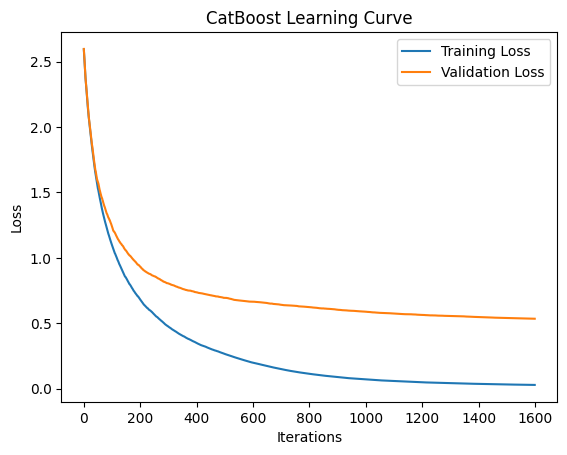

In [23]:
# Get learning curve results
eval_results = catboost_model.get_evals_result()

# Extract training and validation loss values
train_loss = eval_results['learn']
validation_loss = eval_results['validation']

# Plot learning curve
plt.plot(pd.DataFrame(train_loss), label='Training Loss')
plt.plot(pd.DataFrame(validation_loss), label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('CatBoost Learning Curve')
plt.legend()
plt.show()

###**Predict (Test)**

In [24]:
prediction_train = catboost_model.predict(train_X)
# Evaluating the accuracy of the best model
accuracy = accuracy_score(train_y, prediction_train)
print("Best Model Accuracy - train:", accuracy)

prediction_test = catboost_model.predict(test_X)
# Evaluating the accuracy of the best model
accuracy = accuracy_score(test_y, prediction_test)
print("Best Model Accuracy - test:", accuracy)

Best Model Accuracy - train: 0.9056603773584906
Best Model Accuracy - test: 0.8021978021978022


**We can observe we achieved an accuracy of 80%**

###**Five first predictions vs real data**

In [39]:
print(f'Real Data:\n{pd.DataFrame(train_y.head(5).values)}\n')
print(f'Predicted:\n{pd.DataFrame(prediction_train[0:5])}')

Real Data:
                      0
0              wercklei
1  sisalana_f_marginata
2                  IAC4
3              sisalana
4                  IAC4

Predicted:
                      0
0              wercklei
1  sisalana_f_marginata
2                  IAC4
3              sisalana
4              sisalana


"Here (below), we have an example of output where the model outputs the probability of each prediction. In this case, the real value is '**tequilana**,' and the model predicts '**tequilana**' with a chance of 96.31%

In [43]:
np.set_printoptions(suppress=True)
classes = catboost_model.classes_.tolist()
sample = 10
probs = catboost_model.predict_proba(train_X.iloc[sample])
probabildade = pd.Series(probs*100).values.tolist()
print(f'Real value:\n{train_y.iloc[sample]}')
results = pd.DataFrame()
results['class'] = classes
results['probs'] = probs*100
results[results['probs']>=10]
print(results)

Real value:
tequilana
                         class      probs
0                       H11648   0.154943
1                         IAC4   0.225418
2                   amaniensis   0.172496
3                    americana   0.544065
4   angustifolia_var_marginata   0.202324
5                    attenuata   0.133117
6                  desmettiana   0.287361
7      fourcroydes_var_remigio   0.307452
8                   furcroydes   0.668563
9                     sisalana   0.486088
10        sisalana_f_marginata   0.178436
11                   tequilana  96.311639
12                    vivipara   0.175927
13                    wercklei   0.152171


##Results + SHAP - Train

###Confusion Matrix - Train

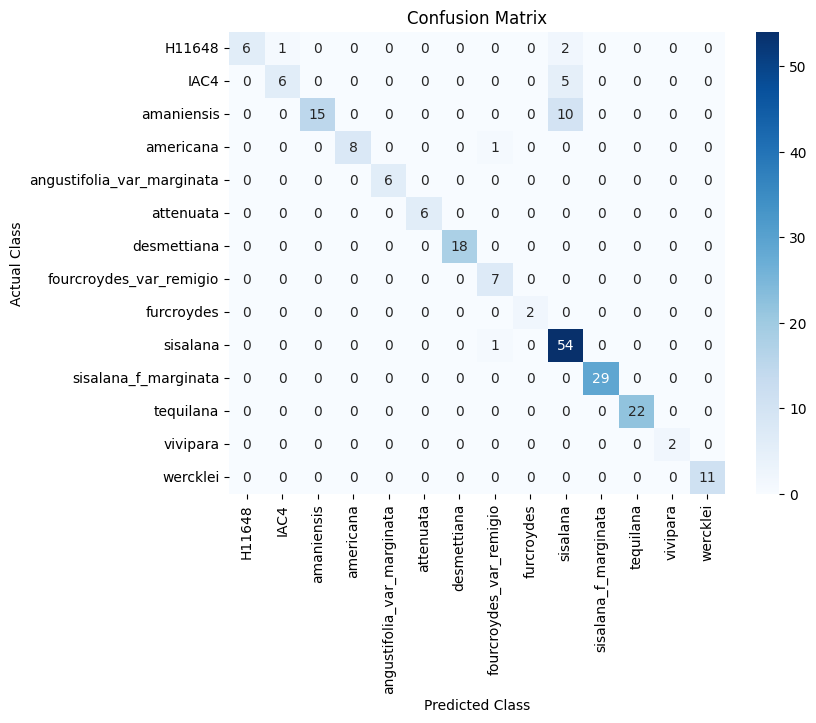

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already performed the grid search and obtained the best_model and predictions

# Creating a confusion matrix
cm = confusion_matrix(train_y, prediction_train)

# Getting the unique class labels
class_labels = catboost_model.classes_.tolist()

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

###SHAP - Train

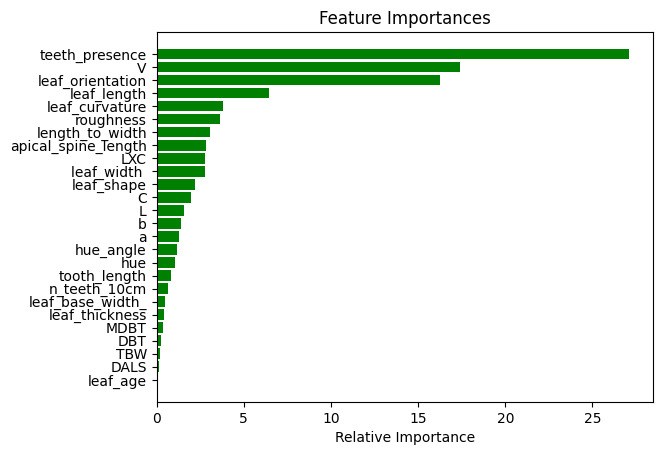

In [46]:
importances = catboost_model.feature_importances_
indices = np.argsort(importances)
features = train_X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
class_labels = catboost_model.classes_.tolist()
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(train_X)

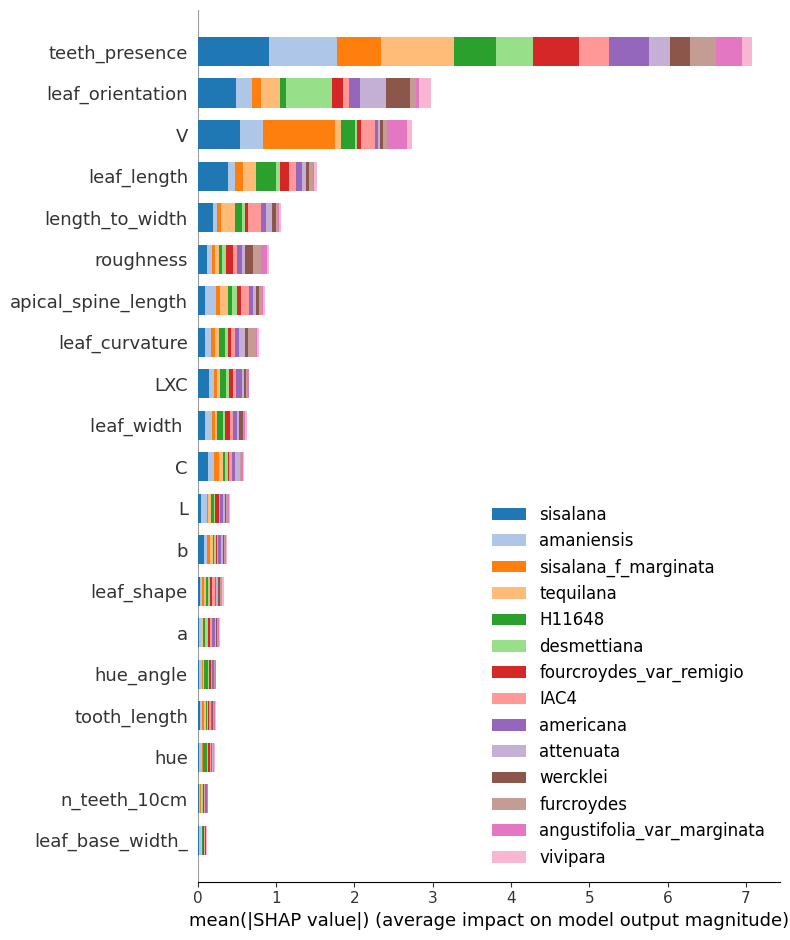

In [48]:
import matplotlib.pyplot as pl
shap.initjs()
# Create the summary plot with the custom colors
shap.summary_plot(shap_values, train_X, plot_type="bar", class_names=class_labels, color=pl.get_cmap("tab20"))

Finally, we have the interpretation of the model, which shows us which morphological characteristic is most important for the prediction of our model. In this case, the most crucial feature is the **presence of teeth**, followed by **leaf orientation**, and then by the **"V"** *indicating whether the plant has a lateral stripe (marginata) on the leaf*. This graph also indicates which varieties rely more on this characteristic for classification. In this case, ***sisalana (dark blue), amanienses (royal blue), and tequilana (light orange)*** are the varieties that most utilize the presence/absence of teeth for classification, when compared, for example, with ***vivipara (light pink)***.

It is also quite clear that the variable "V" significantly impacts the prediction of ***sisalana_f_marginata***.

##**Agave sisalana f marginata**

That is clear when We see this plant:

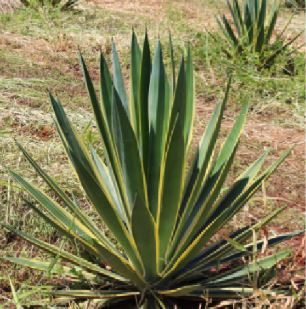

In the graph below, we have how much each variable contributes to the prediction of a specific taxon. Below, we have Agave wecklei. One of the continuous variables that stands out is the leaf width. We can observe that the wider the leaf, the higher the chance of being classified as Agave wecklei.

wercklei


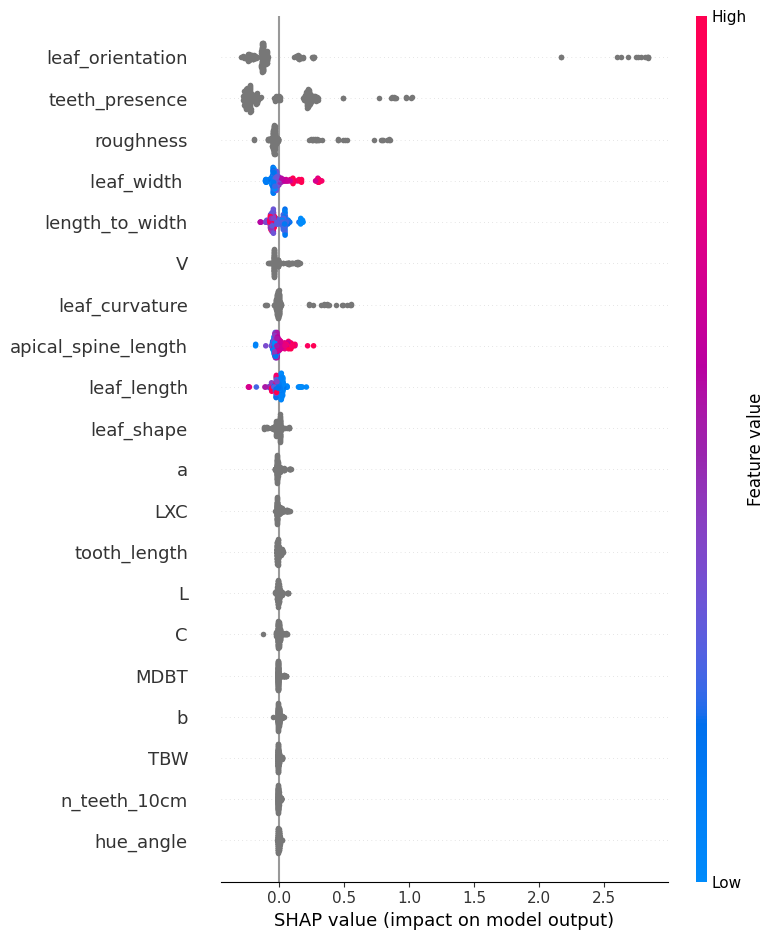

In [57]:
import matplotlib.pyplot as plt
#shap.initjs()
# Create the summary plot with the custom colors
print(class_labels[13])
shap.summary_plot(shap_values[13], train_X, class_names=class_labels)

##**Agave wercklei**

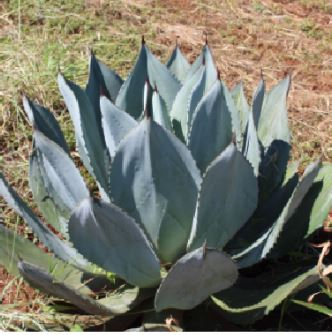